<a href="https://colab.research.google.com/github/genarioazevedoufape/atividades_pet_data_science/blob/main/%5BPET%5D_atividade_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import seaborn as sns

##Dados das Séries Temporais

Este conjunto de dados contém preços de ações do Financial Times - Exchange (FTSE), NIKKEI (Japão), SPX e DAX (Alemão) no intervalo entre 1994 - 2018.

### Análise dos dados

In [ ]:
path = 'https://raw.githubusercontent.com/genarioazevedoufape/atividades_pet_data_science/main/times_series/Mercados%20financeiros/Index2018.csv'
dados = pd.read_csv(path)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [ ]:
dados.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [ ]:
dados.tail()

,date,spx,dax,ftse,nikkei
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88
6268,29/01/2018,2853.528411,13324.48,7671.533300,23629.34


In [ ]:
dados.date = pd.to_datetime(dados.date, format='%d/%m/%Y')

In [ ]:
dados.set_index('date', inplace=True)

<Axes: xlabel='date'>

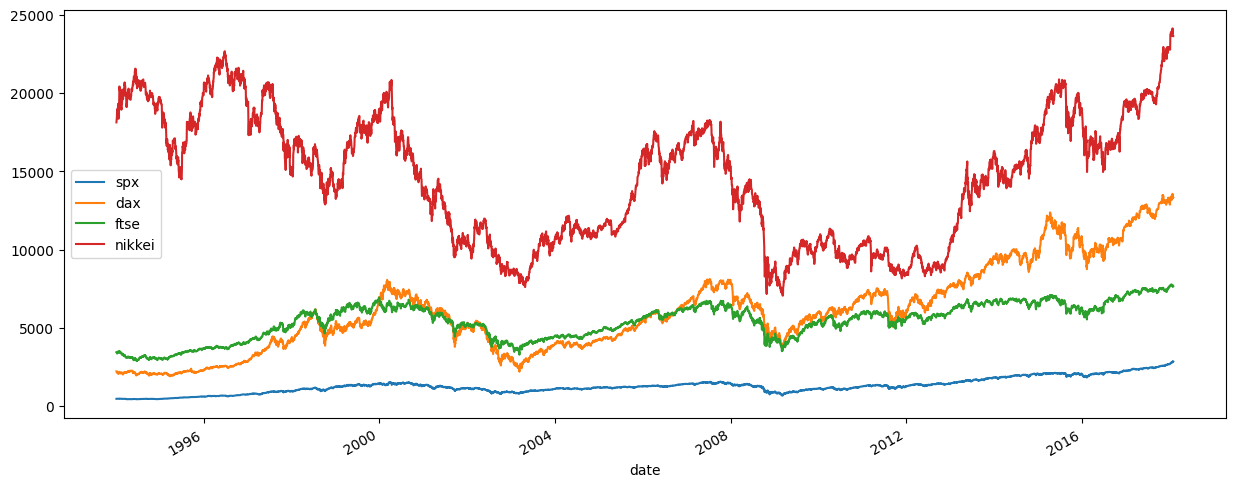

In [ ]:
dados.plot()

## Série Temporal DAX

In [ ]:
# dados_mensal = dados.resample('M').mean()

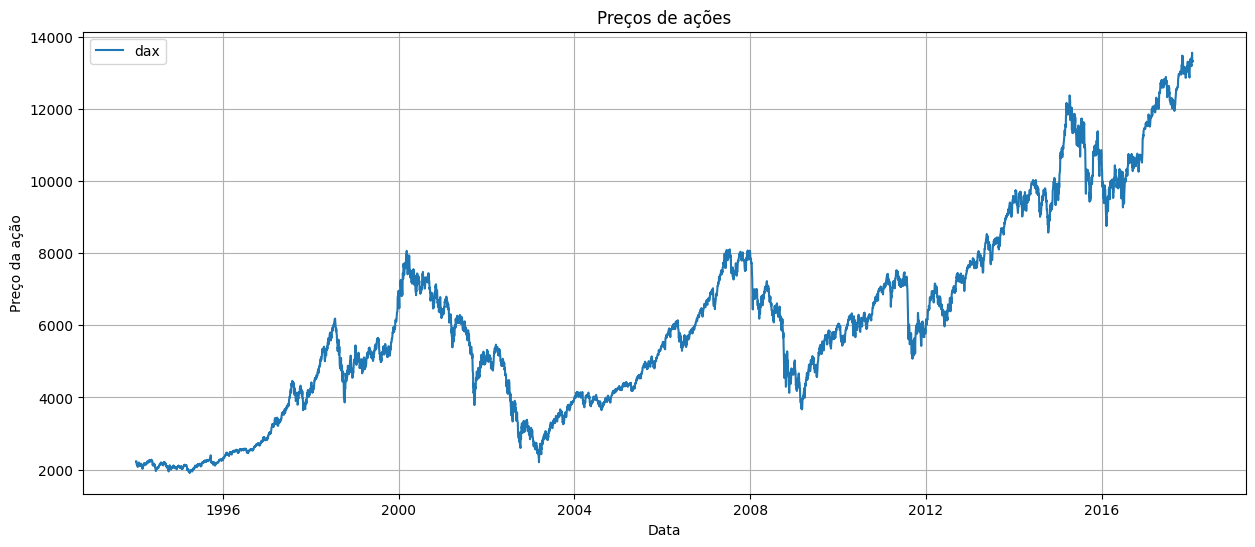

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(dados.index, dados['dax'], label='dax')
plt.xlabel('Data')
plt.ylabel('Preço da ação')
plt.title('Preços de ações')
plt.legend()
plt.grid(True)
plt.show()

O gráfico mostra uma tendência de alta. Existem flutuações notáveis ao longo do tempo, com picos e vales evidentes.

###Análise de Tendência ROLLING / Média Movél

In [ ]:
media = dados['dax'].rolling(window = 30, min_periods = 10).mean()
desv = dados['dax'].rolling(window = 30,  min_periods = 10).std()

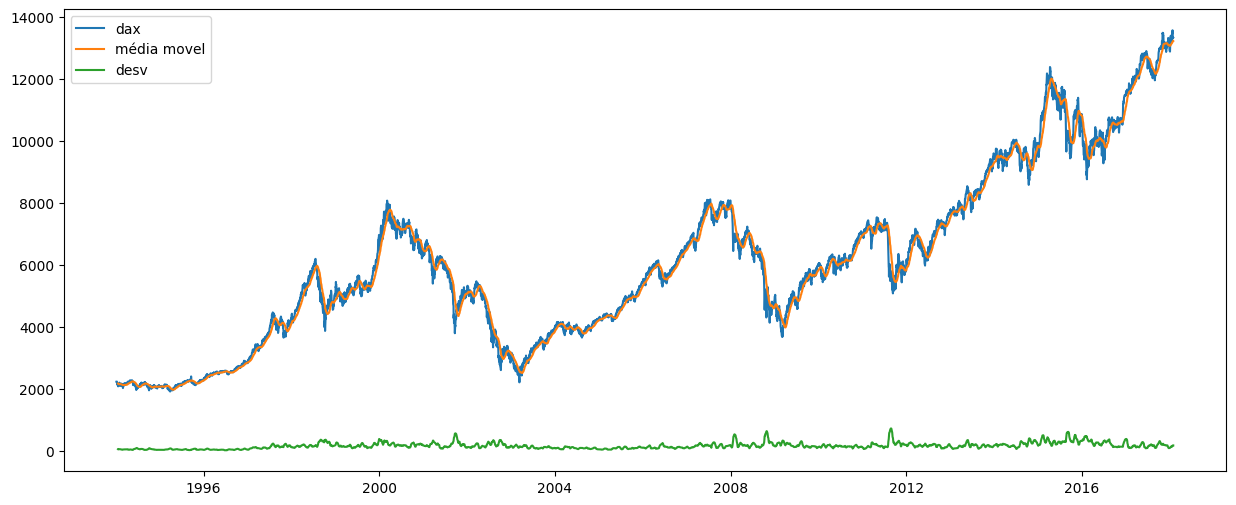

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(dados['dax'], label = 'dax')
plt.plot(media, label = 'média movel')
plt.plot(desv, label = 'desv')
plt.legend(loc='best')
plt.show()

A média móvel em relação a ação DAX é calculada com uma janela de 30 dias e requer pelo menos 10 observações não nulas para calcular cada ponto na série. Isso garante que a média móvel seja calculada apenas quando houver dados suficientes disponíveis. Observamos uma tendência geral de alta ao longo do tempo. Isso sugere que o preço da ação tende a alta. A proximidade entre a média móvel e os dados originais demonstra uma correlação forte, significando que a média móvel é um bom representante do comportamento dos dados.

### Analise dos componentes da série temporal
**Análise da Sazonalidade**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
dados_mensais = dados.resample('M').mean()

In [ ]:
decomposicao = seasonal_decompose(dados_mensais['dax'], model='multiplicative')

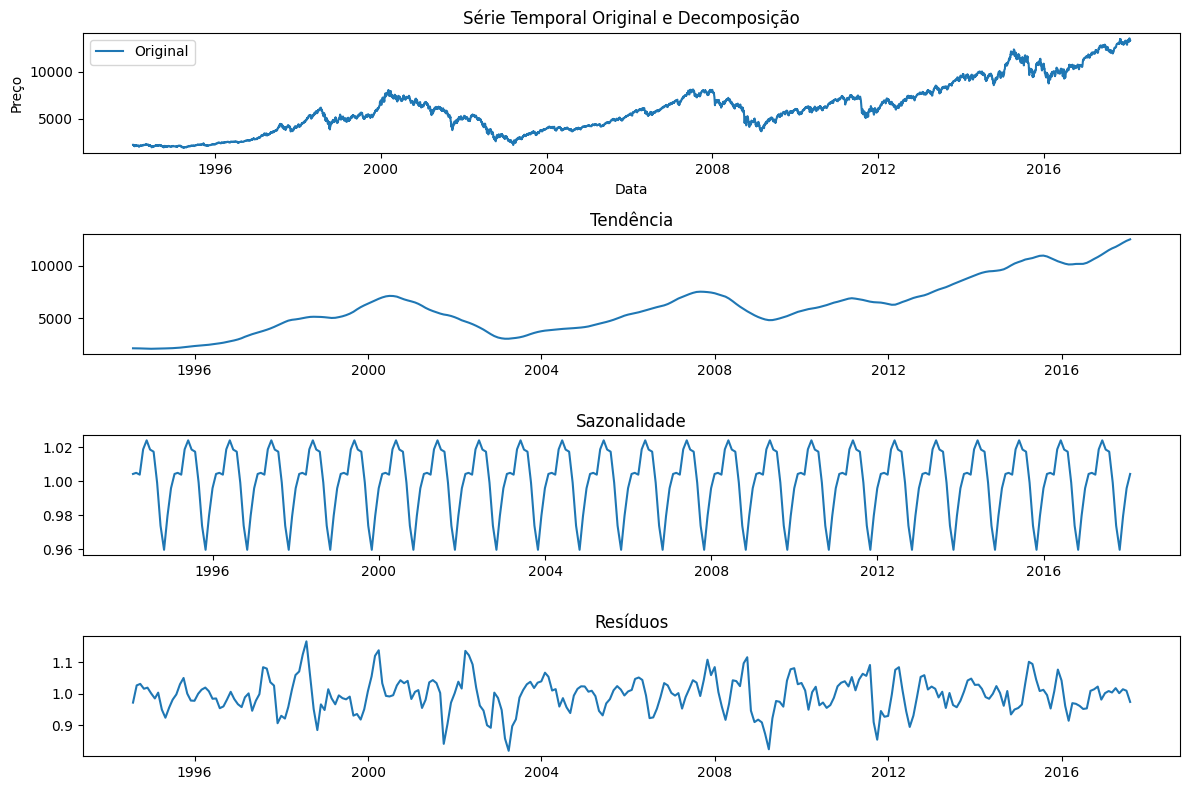

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(dados.index, dados['dax'], label='Original')
plt.title('Série Temporal Original e Decomposição')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()

plt.subplot(412)
plt.plot(decomposicao.trend)
plt.title('Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal)
plt.title('Sazonalidade')

plt.subplot(414)
plt.plot(decomposicao.resid)
plt.title('Resíduos')

plt.tight_layout()
plt.show()

Observações:


*   A série temporal mostra uma tendência ascendente, indicando um aumento ao longo do tempo.

*  As flutuações regulares sugerem padrões sazonais.

*  As variações irregulares em torno de um valor central indicam que há fatores aleatórios afetando a série temporal.

A tendência suave e a sazonalidade clara indicam que a série temporal é consistente e previsível até certo ponto.

In [ ]:
import statsmodels.api as sm

<Figure size 1500x600 with 0 Axes>

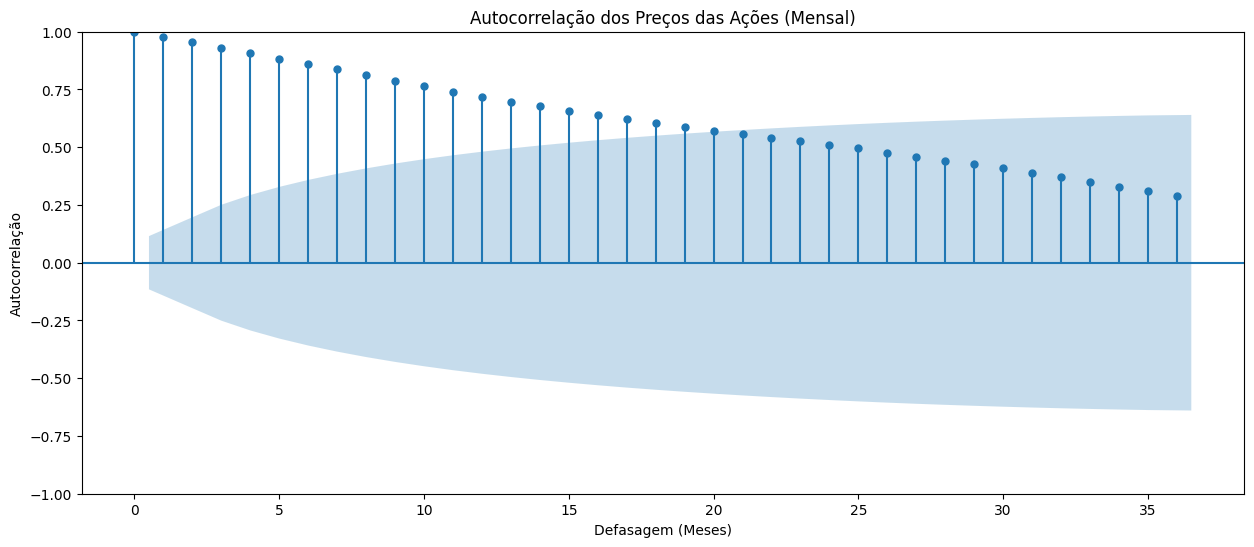

In [ ]:
plt.figure(figsize=(15, 6))
sm.graphics.tsa.plot_acf(dados_mensais['dax'], lags=36)
plt.title('Autocorrelação dos Preços das Ações (Mensal)')
plt.xlabel('Defasagem (Meses)')
plt.ylabel('Autocorrelação')
plt.show()


O gráfico indica uma autocorrelação positiva. E a diminuição da correlação indicando uma tendência na distribuição dos dadsos. À medida que a defasagem aumenta, próximo aos 20 meses, a autocorrelação diminui, sugerindo que os preços das ações estão menos correlacionados com valores mais distantes no tempo.

> A função de autocorrelação (FAC), mede o grau de correlação de uma variável, em um dado instante, consigo mesma, em um instante de tempo posterior,


###Teste ADF

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(dados_mensais.dax)
print('Estatística do teste ADF:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t{}: {:.3f}'.format(key, value))


Estatística do teste ADF: 0.007768492603884336
Valor-p: 0.9591698391547631
Valores críticos:
	1%: -3.454
	5%: -2.872
	10%: -2.572


 Com base nos resultados do teste ADF, não podemos considerar os dados como estacionários. Isso sugere que os preços das ações possuem algum tipo de tendência ou padrão que varia ao longo do tempo.

>O teste ADF (Augmented Dickey-Fuller) é um teste estatístico usado para determinar se uma série temporal tem raiz unitária, o que significa que a série temporal é não estacionária. Se a série temporal não for estacionária, isso pode indicar a presença de tendências ou padrões que mudam ao longo do tempo.

###Previsão SARIMAX


In [ ]:
train_size = int (len(dados_mensais) * 0.8)

In [ ]:
train, test = dados_mensais[:train_size], dados_mensais[train_size:]

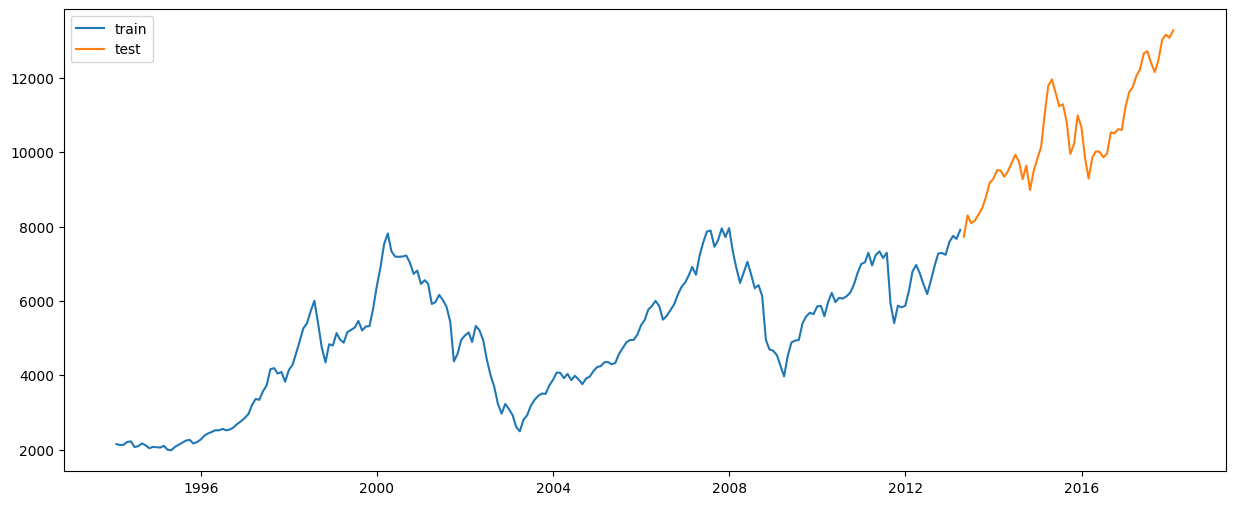

In [ ]:
plt.plot(train.dax, label = 'train')
plt.plot(test.dax, label = 'test')
plt.legend(loc = 'best')
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

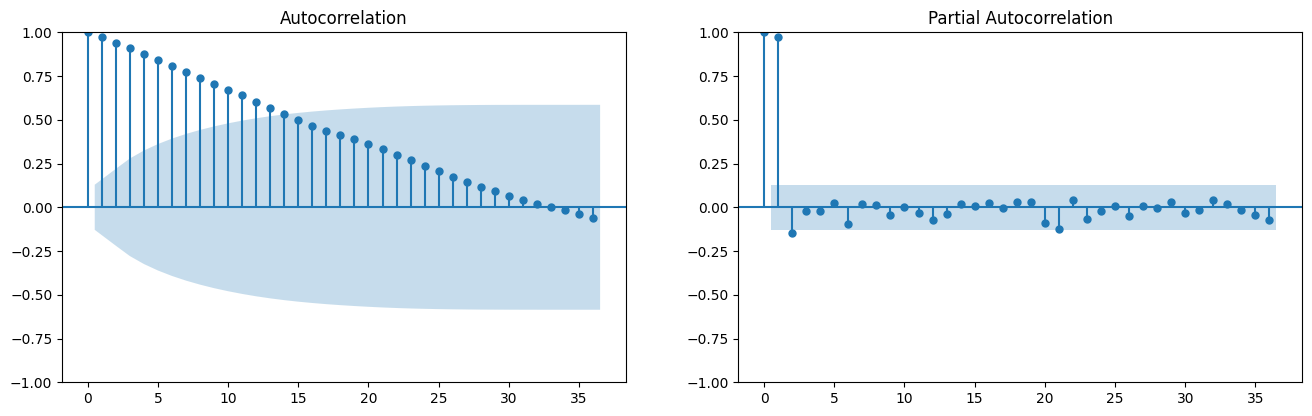

In [ ]:
acf_pacf(train.dax, 36)

In [ ]:
def teste_estacionaria(serie):
  p_value = adfuller(serie)[1]
  print(p_value)
  if p_value < 0.05:
    print("Série estacionária")
  else:
    print("Série não estacionária")

In [ ]:
# Aplicando o diff
teste_estacionaria(train.dax.diff(1).dropna())

1.8859880864030794e-20
Série estacionária


<Axes: xlabel='date'>

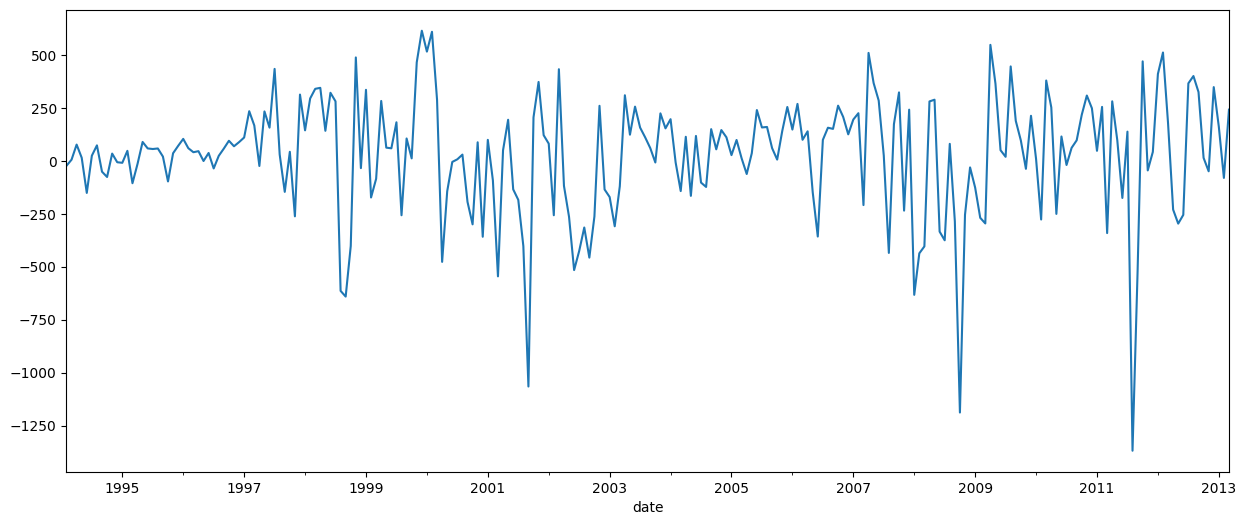

In [ ]:
train.dax.diff(1).dropna().plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
import itertools

p_values = range(0, 1)
d = 1
q_values = range(1, 15)

param_combinations = list(itertools.product(p_values, [d], q_values))

best_aic = float("inf")
best_params = None

for param in param_combinations:
    try:
        model = SARIMAX(train.dax, order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue

print("Melhores parâmetros (p, d, q):", best_params)
print("Melhor AIC:", best_aic)


Melhores parâmetros (p, d, q): (0, 1, 1)
Melhor AIC: 3230.308806948654


O AIC é uma métrica estatística usada para avaliar a qualidade relativa dos modelos estatísticos. Quanto menor o valor do AIC, melhor é o ajuste do modelo aos dados.

In [ ]:
model = SARIMAX(train.dax,
                order = (best_params)
                ).fit()

In [ ]:
prev_train = model.predict()

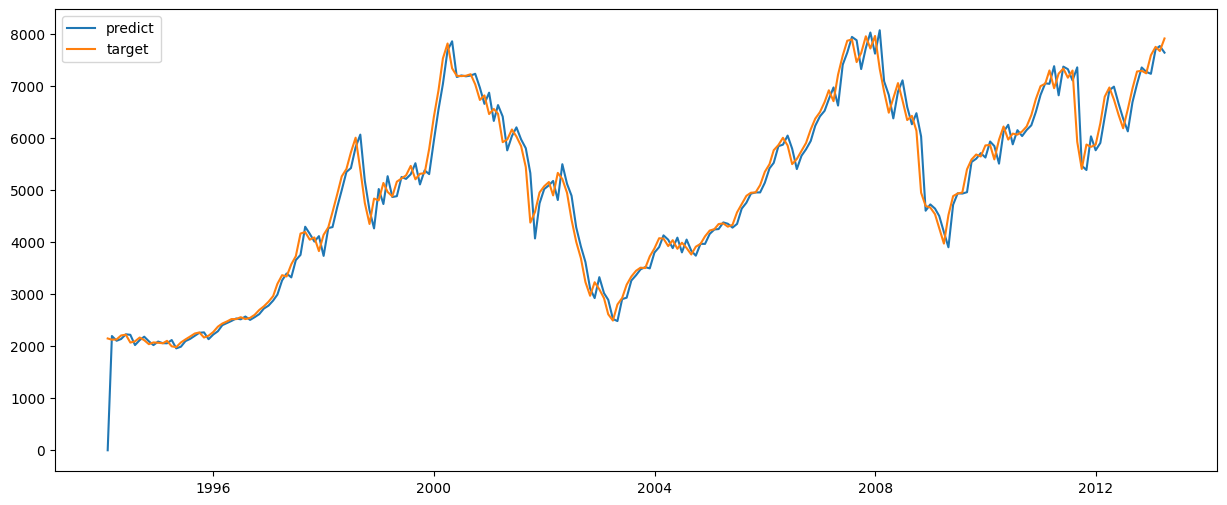

In [ ]:
plt.plot(prev_train, label = 'predict')
plt.plot(train.dax, label = 'target')
plt.legend(loc = 'best')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error

In [ ]:
RMSE = np.sqrt(mean_squared_error(train.dax, prev_train))
print("RMSE:", RMSE)

RMSE: 303.2717430199619


In [ ]:
mape = MAPE(train.dax, prev_train)
print("Média das porcentagens absolutas dos erros (MAPE):", mape)

Média das porcentagens absolutas dos erros (MAPE): 0.04298915905009972


In [ ]:
prev_test = model.forecast(len(test.dax))

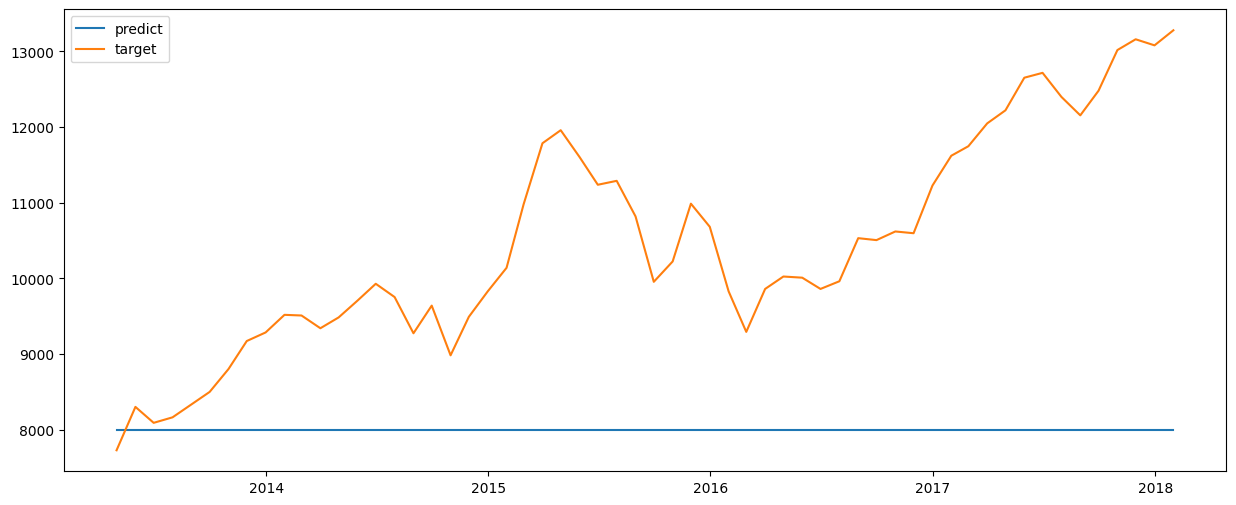

In [ ]:
plt.plot(prev_test, label = 'predict')
plt.plot(test.dax, label = 'target')
plt.legend()
plt.show()

 Quando um gráfico da série temporal parece quase horizontal, sem tendência óbvia para cima ou para baixo, dizemos que a série está exibindo um comportamento flat.

In [ ]:
RMSE = np.sqrt(mean_squared_error(test.dax, prev_test))
print("RMSE:", RMSE)

RMSE: 2855.546604078934


In [ ]:
mape = MAPE(test.dax, prev_test)
print("MAPE:", mape)

MAPE: 0.22340822777332164


In [ ]:
ruido = train.dax - prev_train

<Axes: xlabel='date'>

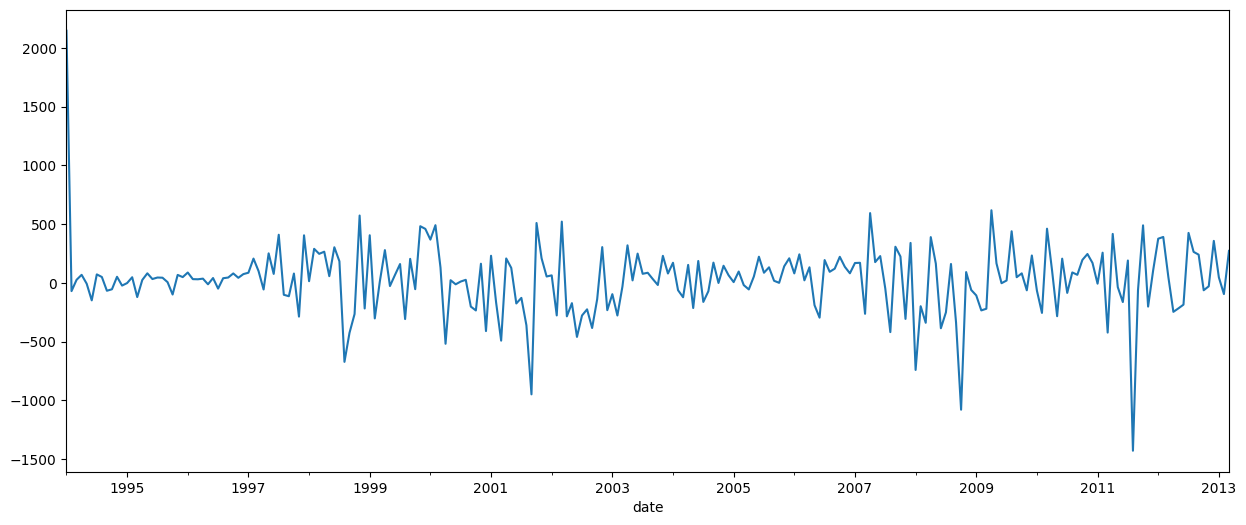

In [ ]:
ruido.plot()

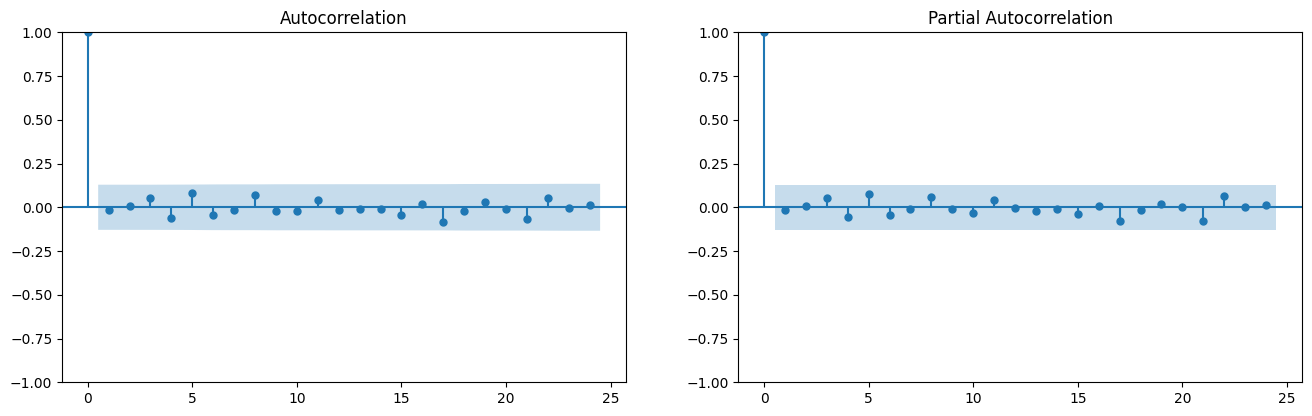

In [ ]:
acf_pacf(ruido, 24)

###Modelos Machine Learning

In [ ]:
df = dados[['dax']]

In [ ]:
df = df.resample('M').mean()

In [ ]:
train_size = int(0.7 * len(df))
test_size = int(0.15 * len(df))
val_size = len(df) - train_size - test_size

In [ ]:
train = df[:train_size]
test= df[train_size:train_size+test_size]
val = df[train_size+test_size:]

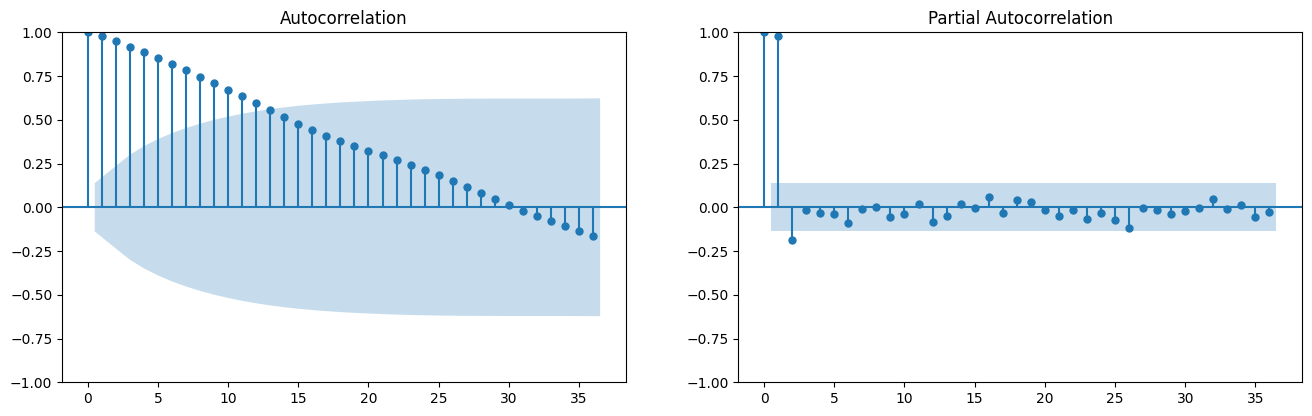

In [ ]:
acf_pacf(train.values, 36)

In [ ]:
def create_sliding_windows(series, window_size):

    list_of_sliding_windows = []
    list_size_to_iterate = len(series) - window_size
    for i in range(0, list_size_to_iterate):
        window = series[i: i + window_size + 1]
        list_of_sliding_windows.append(window)

    return np.array(list_of_sliding_windows).reshape(len(list_of_sliding_windows), window_size+1)

In [ ]:
train_windows = create_sliding_windows(train, 12)
val_windows = create_sliding_windows(val, 12)
test_windows = create_sliding_windows(test, 12)

In [ ]:
X_train = train_windows[:, 0:-1]
y_train = train_windows[:, -1]

X_val = val_windows[: ,0: -1 ]
y_val = val_windows[: , -1 ]

X_test = test_windows[: ,0: -1 ]
y_test = test_windows[: , -1 ]

In [ ]:
X_train_full = np.vstack([X_train, X_val])
y_train_full = np.hstack([y_train, y_val])

####Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
criterio = ['squared_error', 'friedman_mse', 'absolute_error']

mse_best = np.inf
best_param = None
for c in criterio:
  modelo = DecisionTreeRegressor(criterion=c)
  modelo.fit(X_train, y_train)
  prev_val = modelo.predict(X_val)

  mse_val = MSE(y_val, prev_val)
  if mse_val < mse_best:
    mse_best = mse_val
    best_param = c


In [ ]:
[mse_best, best_param]

[16791948.109311115, 'squared_error']

In [ ]:
modelo_DTR = DecisionTreeRegressor(criterion=best_param)
modelo_DTR.fit(X_train_full, y_train_full)
prev_train_DTR = modelo_DTR.predict(X_train_full)

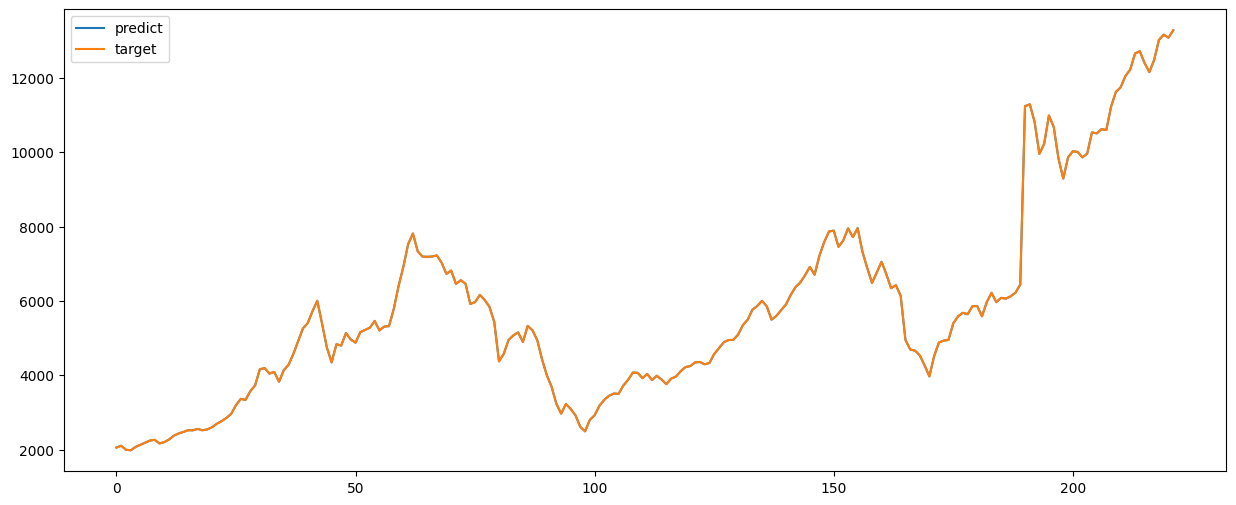

In [ ]:
plt.plot(prev_train_DTR, label = 'predict')
plt.plot(y_train_full, label = 'target')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse_train_DTR = mean_squared_error(y_train_full, prev_train_DTR, squared=False)
print("RMSE no conjunto de treino:", rmse_train_DTR)

RMSE no conjunto de treino: 0.0


In [ ]:
prev_test_DTR = modelo_DTR.predict(X_test)

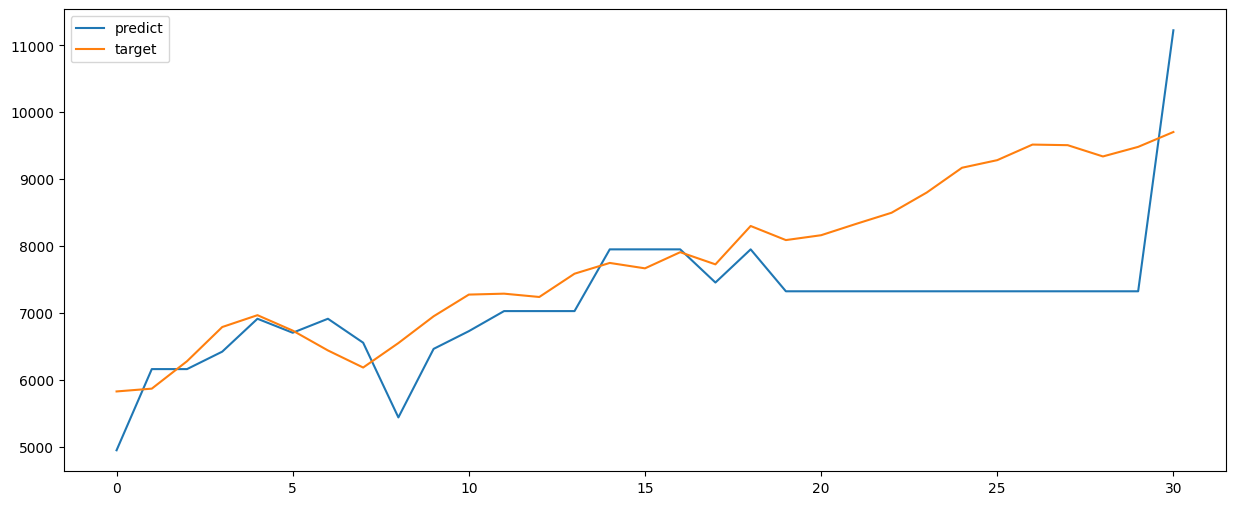

In [ ]:
plt.plot(prev_test_DTR, label = 'predict')
plt.plot(y_test, label = 'target')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse_test_DTR = mean_squared_error(y_test, prev_test_DTR, squared=False)
print("RMSE no conjunto de teste:", rmse_test_DTR)

RMSE no conjunto de teste: 1101.7456356493774


####SVM de Regressão (SVR)

SVR é uma técnica útil para prever valores contínuos a partir de dados de treinamento, permitindo a flexibilidade de lidar com relações não-lineares entre os recursos e a variável de destino, através do uso de kernels.
O SVR busca encontrar uma função que se aproxime ao máximo dos dados de treinamento, ao mesmo tempo em que mantém uma margem de erro aceitável. Essa margem é controlada por um parâmetro chamado de "epsilon", que determina a largura da faixa em torno da linha de regressão dentro da qual os pontos de dados não são considerados erros.


In [ ]:
from sklearn.svm import SVR

In [ ]:
modelo_SVR = SVR(C = 1, epsilon = 0.1, kernel = 'linear')
modelo_SVR.fit(X_train_full, y_train_full)
prev_train_SVR = modelo_SVR.predict(X_train_full)


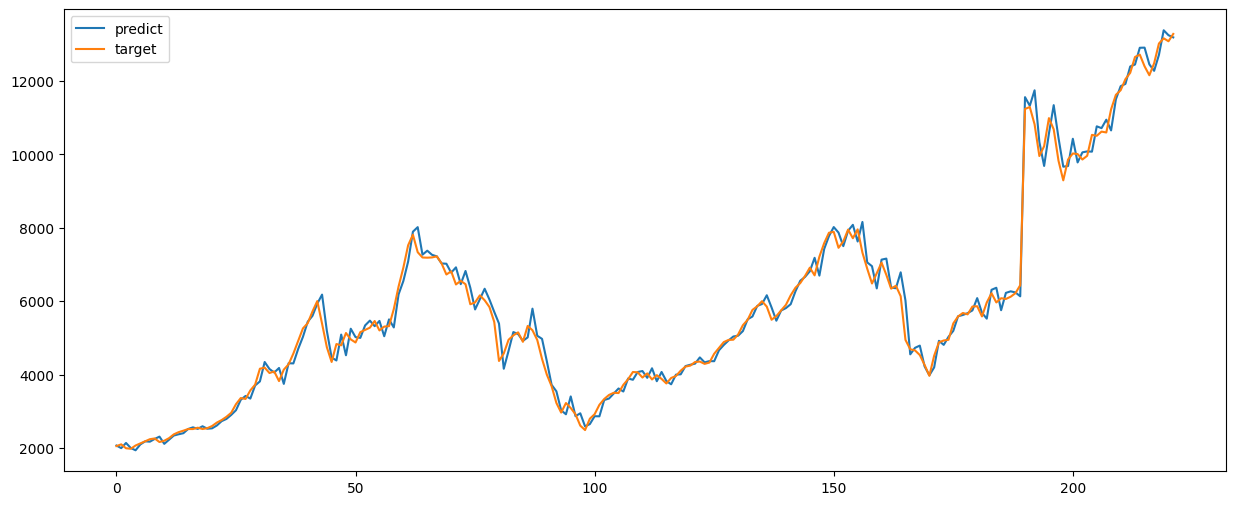

In [ ]:
plt.plot(prev_train_SVR, label = 'predict')
plt.plot(y_train_full, label = 'target')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse_train_SVR = mean_squared_error(y_train_full, prev_train_SVR, squared=False)
print("RMSE no conjunto de treino:", rmse_train_SVR)

RMSE no conjunto de treino: 280.1246298519625


In [ ]:
prev_test_SVR = modelo_SVR.predict(X_test)

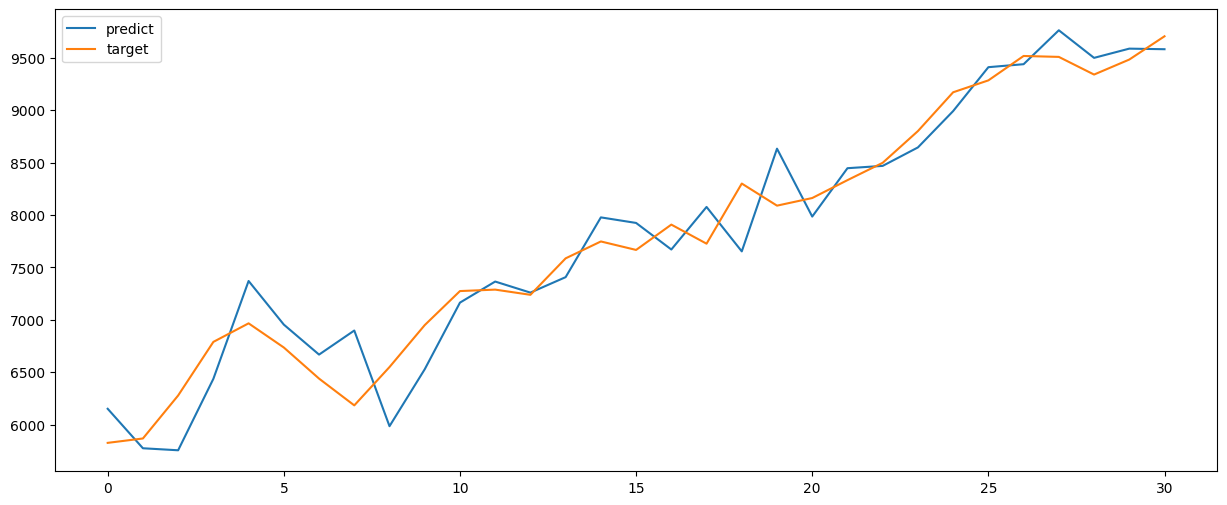

In [ ]:
plt.plot(prev_test_SVR, label = 'predict')
plt.plot(y_test, label = 'target')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse_test_SVR = mean_squared_error(y_test, prev_test_SVR, squared=False)
print("RMSE no conjunto de teste:", rmse_test_SVR)

RMSE no conjunto de teste: 315.35741471489933


####XGBoost - XGBRegressor

O XGBoost utiliza um conjunto de árvores de decisão em série. Cada árvore é treinada sequencialmente, com cada nova árvore corrigindo os erros residuais cometidos pelas árvores anteriores.

In [ ]:
from xgboost import XGBRegressor

In [ ]:
modelo_XGB = XGBRegressor(objective='reg:squarederror', gamma = 0, learning_rate = 0.1, max_depth = 3, n_estimators = 100)
modelo_XGB.fit(X_train_full, y_train_full)
prev_train_XGB = modelo_XGB.predict(X_train_full)

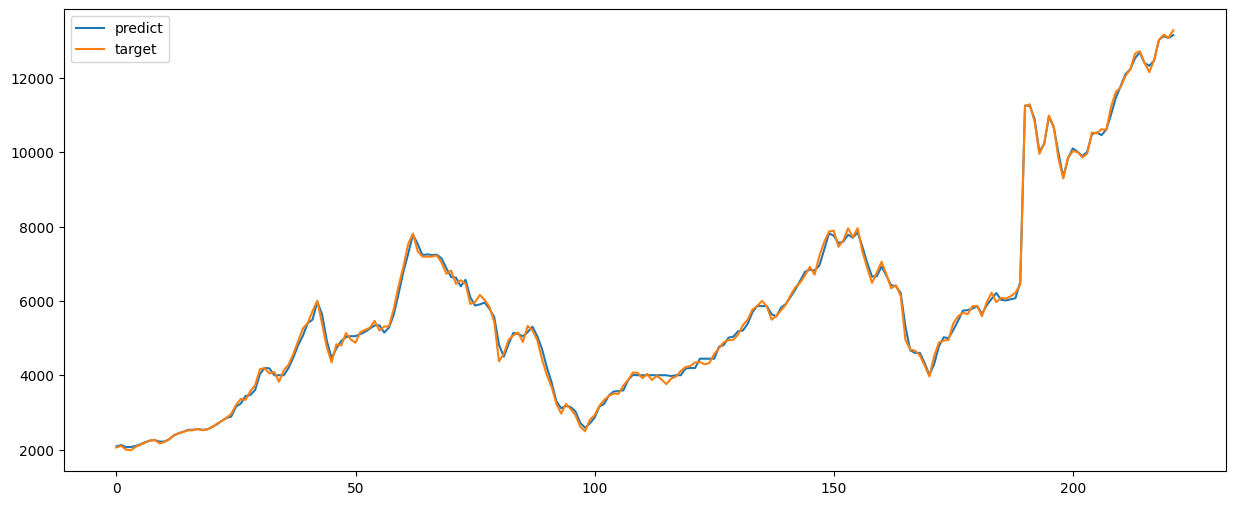

In [ ]:
plt.plot(prev_train_XGB, label = 'predict')
plt.plot(y_train_full, label = 'target')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse_train_XGB = mean_squared_error(y_train_full, prev_train_XGB, squared=False)
print("RMSE no conjunto de treino:", rmse_train_XGB)

RMSE no conjunto de treino: 112.58866320111593


In [ ]:
prev_test_XGB = modelo_XGB.predict(X_test)

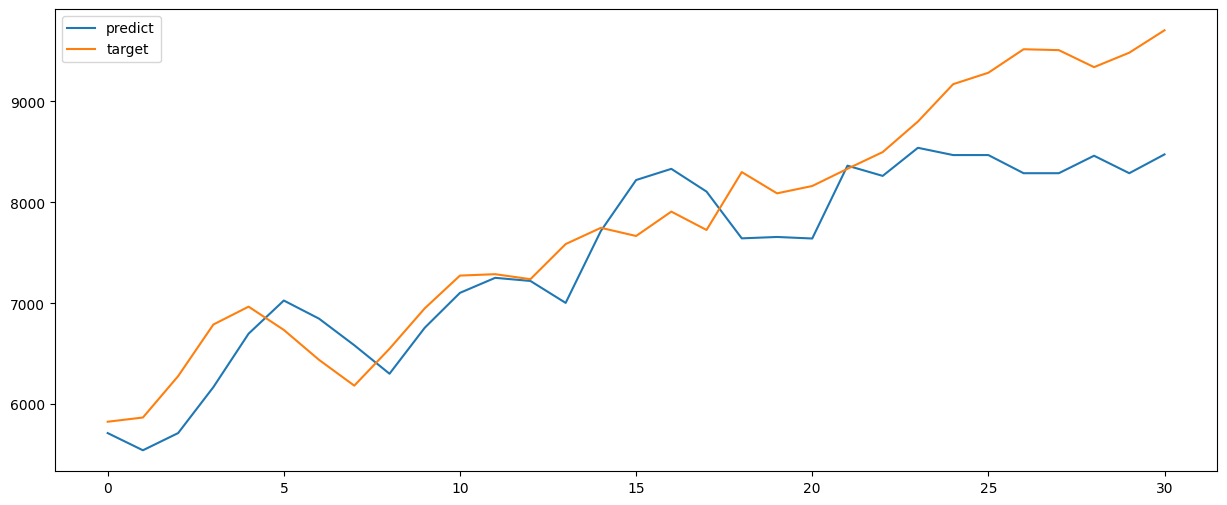

In [ ]:
plt.plot(prev_test_XGB, label = 'predict')
plt.plot(y_test, label = 'target')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse_test_XGB = mean_squared_error(y_test, prev_test_XGB, squared=False)
print("RMSE no conjunto de teste:", rmse_test_XGB)

RMSE no conjunto de teste: 603.1951285859825


SVR x XGboost Regressor

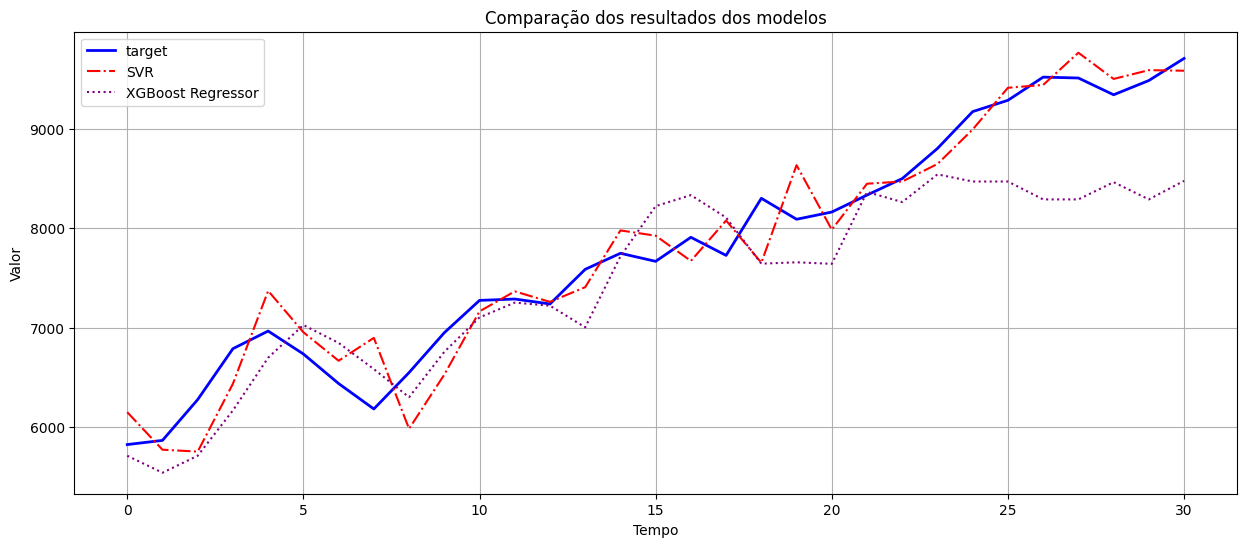

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='target', linewidth=2, color='blue')
plt.plot(prev_test_SVR, label='SVR', linestyle='-.', color='red')
plt.plot(prev_test_XGB, label='XGBoost Regressor', linestyle=':', color='purple')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title('Comparação dos resultados dos modelos')
plt.legend()
plt.grid(True)
plt.show()

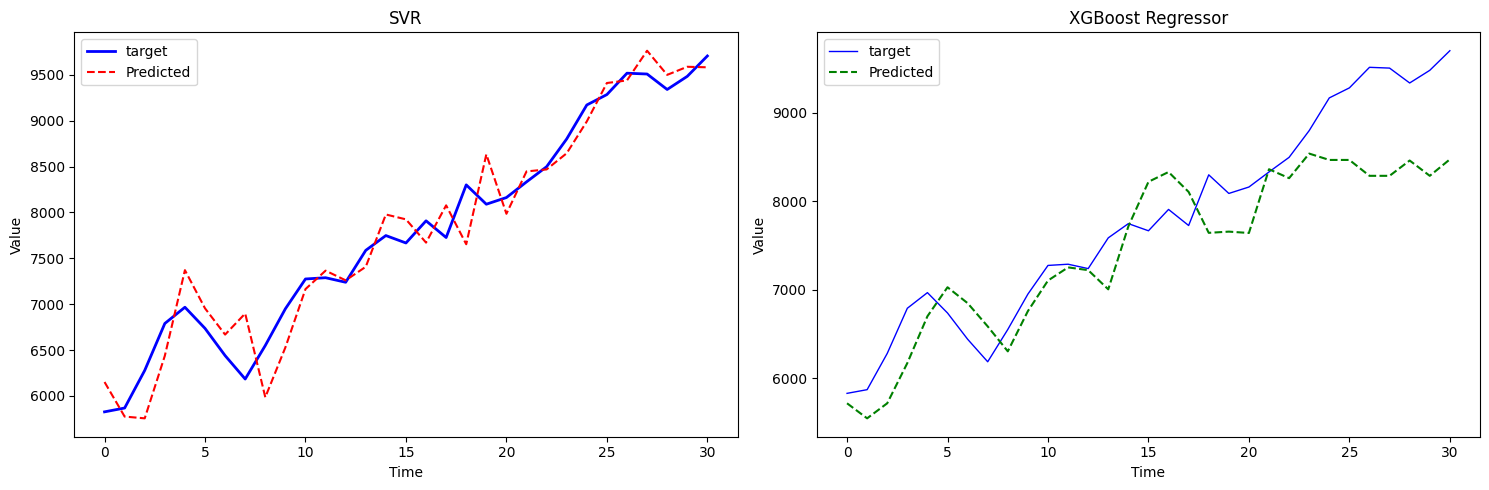

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# SVR
axs[0].plot(y_test, label='target', linewidth=2, color='blue')
axs[0].plot(prev_test_SVR, label='Predicted', linestyle='--', color='red')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Value')
axs[0].set_title('SVR')
axs[0].legend()

# XGBoost Regressor
axs[1].plot(y_test, label='target', linewidth=1, color='blue')
axs[1].plot(prev_test_XGB, label='Predicted', linestyle='--', color='green')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Value')
axs[1].set_title('XGBoost Regressor')
axs[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
print("---------------RMSE para dados de Treino---------------\n")
print("RMSE para SVR:", rmse_train_SVR)
print("RMSE para XGBoost Regressor:", rmse_train_XGB)
print("\n")
print("---------------RMSE para dados de Teste---------------\n")
print("RMSE para SVR:", rmse_test_SVR)
print("RMSE para XGBoost Regressor:", rmse_test_XGB)
print("\n------------------------------------------------------\n")

---------------RMSE para dados de Treino---------------

RMSE para SVR: 280.1246298519625
RMSE para XGBoost Regressor: 112.58866320111593


---------------RMSE para dados de Teste---------------

RMSE para SVR: 315.35741471489933
RMSE para XGBoost Regressor: 603.1951285859825

------------------------------------------------------



##NIXTLA - MLFORECAST
Nixtla mlforecast é uma biblioteca projetada para previsão de séries temporais usando Machine Learning. Ele fornece funcionalidades para automatizar a criação de recursos e facilita o uso de vários modelos de aprendizado de máquina para suas tarefas de previsão.

In [ ]:
#!pip install mlforecast

In [ ]:
from mlforecast.utils import generate_daily_series

In [ ]:
df_nixtla = pd.DataFrame(
    {
        'ds' : df.index,
        'y' : df.dax.values
    }
    )

In [ ]:
df_nixtla['unique_id'] = 'price'

In [ ]:
df_nixtla

,ds,y,unique_id
0,1994-01-31,2147.265294,price
1,1994-02-28,2123.696500,price
2,1994-03-31,2128.932174,price
3,1994-04-30,2205.401905,price
4,1994-05-31,2219.889545,price
...,...,...,...
284,2017-09-30,12479.533810,price
285,2017-10-31,13016.989545,price
286,2017-11-30,13159.374545,price
287,2017-12-31,13079.224286,price


In [ ]:
train_size = int(0.8 * len(df_nixtla))
test_size = int(0.20 * len(df_nixtla))

In [ ]:
train = df_nixtla[:train_size]
test= df_nixtla[train_size:]
h = test['ds'].nunique()

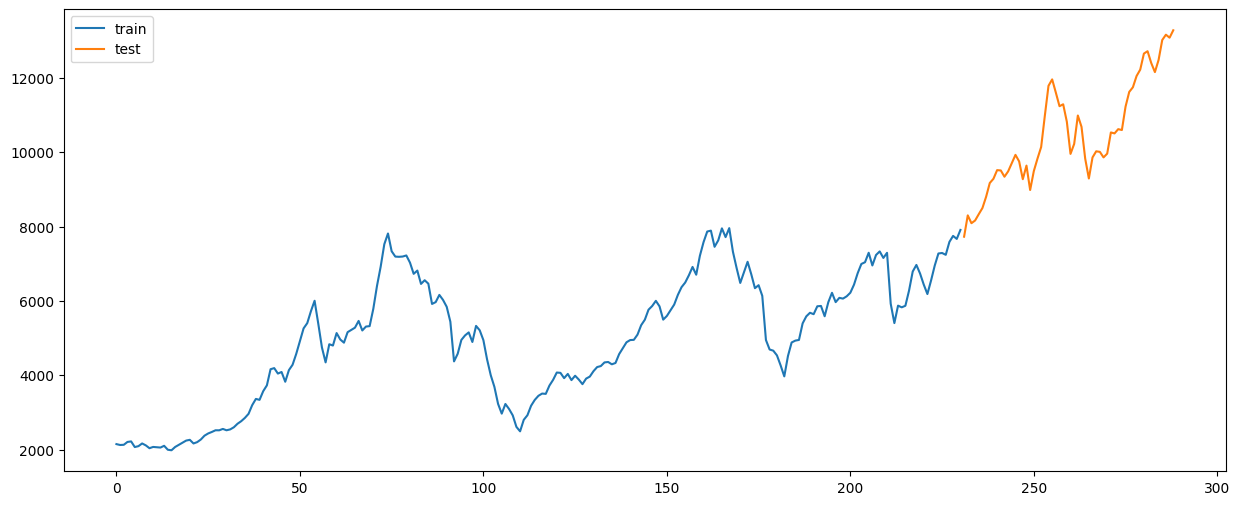

In [ ]:
plt.plot(train.y, label = 'train')
plt.plot(test.y, label = 'test')
plt.legend(loc = 'best')
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from mlforecast import MLForecast
from sklearn.linear_model import LinearRegression
from window_ops.rolling import rolling_mean, rolling_max, rolling_min

models = [XGBRegressor(random_state=0, n_estimators=500), SVR(C = 1, epsilon = 0.1, kernel = 'linear'), LinearRegression(fit_intercept=False)]

model = MLForecast(models=models,
                   freq='M',
                   lags=[12, 24, 36],
                   lag_transforms={
                       1: [(rolling_mean, 12), (rolling_max, 12), (rolling_min, 12)],
                   },
                   date_features=['month'],
                   num_threads=6)


model.fit(train, id_col='unique_id', time_col='ds', target_col='y', static_features=[])

MLForecast(models=[XGBRegressor, SVR, LinearRegression], freq=M, lag_features=['lag12', 'lag24', 'lag36', 'rolling_mean_lag1_window_size12', 'rolling_max_lag1_window_size12', 'rolling_min_lag1_window_size12'], date_features=['month'], num_threads=6)

In [ ]:
p = model.predict(h)
p = p.merge(test[['ds', 'y', 'unique_id']], on=['unique_id', 'ds'], how='left')

In [ ]:
p.head(5)

,unique_id,ds,XGBRegressor,SVR,LinearRegression,y
0,price,2013-04-30,7470.419434,7421.176019,7439.761970,7726.334545
1,price,2013-05-31,7560.471680,7589.859620,7612.987039,8299.874783
2,price,2013-06-30,7564.883789,7620.606954,7664.429839,8089.147500
3,price,2013-07-31,7552.787598,7861.163082,7879.898899,8161.835217
4,price,2013-08-31,6838.329102,7903.834397,7928.903805,8332.462273


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mape_test_LR = mean_absolute_percentage_error(p['y'], p['LinearRegression'])
mape_test_XGB = mean_absolute_percentage_error(p['y'], p['XGBRegressor'])
mape_test_SVR = mean_absolute_percentage_error(p['y'], p['SVR'])

In [ ]:
print("---------------MAPE para dados de Teste---------------\n")
print("MAPE para SVR:", mape_test_SVR)
print("MAPE para XGBoost Regressor:", mape_test_XGB)
print("MAPE para Linear Regression:", mape_test_LR)
print("\n------------------------------------------------------\n")

---------------MAPE para dados de Teste---------------

MAPE para SVR: 0.08204466073912636
MAPE para XGBoost Regressor: 0.3627782422080984
MAPE para Linear Regression: 0.1390256241928049

------------------------------------------------------



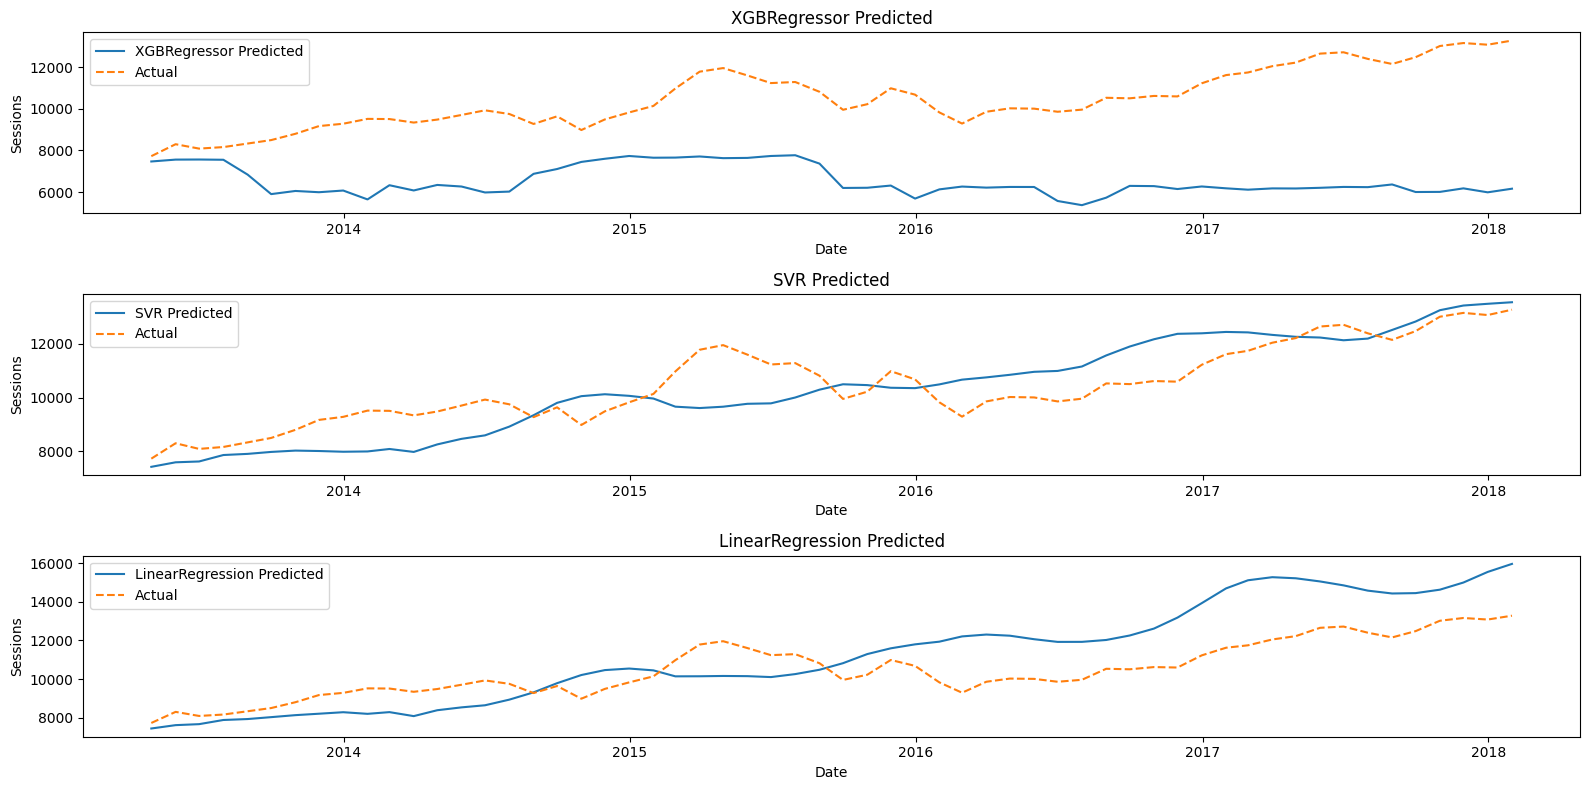

In [ ]:
import matplotlib.pyplot as plt

for device in p['unique_id'].unique():
    p_device = p.loc[p['unique_id'] == device]

    fig, ax = plt.subplots(3, 1, figsize=(16, 8))
    models = [('XGBRegressor', 'XGBRegressor Predicted'), ('SVR', 'SVR Predicted'), ('LinearRegression', 'LinearRegression Predicted')]
    for i, (model_col, label) in enumerate(models):
        ax[i].plot(p_device['ds'], p_device[model_col], label=label)
        ax[i].plot(p_device['ds'], p_device['y'], label='Actual', linestyle='--')
        ax[i].set_title(label)
        ax[i].set_xlabel('Date')
        ax[i].set_ylabel('Sessions')
        ax[i].legend()
    plt.tight_layout()
    plt.show()